In [222]:
import pandas as pd
import json
import networkx as nx
import glob
import matplotlib.pyplot as plt

In [223]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)

In [224]:
hotel_df_s = pd.read_csv("hotel_sens.csv")
hotel_df_s.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,sentiment
0,0,1160184816060514305,chefjuanboada,Día 2 en Hotel Castellmar https://www.instagra...,2019-08-10 13:43:09+00:00,0,0,NaN,Atacames,0.802902
1,1,1159839684081491969,HotelCARLUZ,Llego el fin de semana y te proponemos algunas...,2019-08-09 14:51:44+00:00,0,0,NaN,Atacames,0.688678
2,2,1157821700341239808,oscarmera_1,#amigos procesos de formación #friends #esmera...,2019-08-04 01:12:59+00:00,3,1,#amigos #friends #esmeraldas #feriado2019 #ins...,Atacames,0.149371
3,3,1157462434388566018,HotelElCisne1y2,Nuestros Queridos Turistas Felices De Conocer ...,2019-08-03 01:25:23+00:00,1,0,NaN,Atacames,0.990453
4,4,1157361204681224195,HotelCARLUZ,!!! Simplemente !!! pic.twitter.com/LH21VSlJyT,2019-08-02 18:43:08+00:00,0,0,NaN,Atacames,0.629843


In [225]:
hospedaje_df_s = pd.read_csv("hospedaje_sens.csv")
hospedaje_df_s.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,sentiment
0,0,1160185098916040704,carturoleon,Te faltó decir viajar 6 8 12 horas por tierra ...,2019-08-10 13:44:17+00:00,1,0,NaN,Gualaquiza,0.879095
1,1,1143526470935109632,riverpeopleraft,Ven y disfruta de conocer la Amazonía con Rive...,2019-06-25 14:28:51+00:00,0,0,NaN,Tena,0.151790
2,2,1159506853354758144,HeneciaEcuador,Buen día Henecias! Si alguien que viaja a Perú...,2019-08-08 16:49:11+00:00,14,5,NaN,El Chaco,0.722887
3,3,1159446378160017411,KattyMejia11,@Airbnb necesito asesoramiento para mecanismo ...,2019-08-08 12:48:52+00:00,0,0,NaN,El Chaco,0.571598
4,4,1159168036756230144,ABRELATAM,En estos últimos días los donantes que se han ...,2019-08-07 18:22:50+00:00,0,0,NaN,El Chaco,0.886135


In [226]:
airbnb_df_s = pd.read_csv("airbnb_sens.csv")
airbnb_df_s.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,sentiment
0,0,1160150293818089472,florencia3g,El tema del reportaje era hablar de la gentrif...,2019-08-10 11:25:59+00:00,5,0,NaN,San Cristobal,0.630286
1,1,1160047591926591488,Lakatus,¿Has probado Airbnb? Regístrate a través de mi...,2019-08-10 04:37:53+00:00,0,0,NaN,San Cristobal,0.934657
2,2,1159936574781452288,elsuperidolo,@SantanderMx buenas tardes si hago un pago con...,2019-08-09 21:16:44+00:00,0,0,NaN,San Cristobal,0.518644
3,3,1159936130180980736,elsuperidolo,Entonces si se considera como compra en el ext...,2019-08-09 21:14:58+00:00,0,0,NaN,San Cristobal,0.428252
4,4,1159934098749583360,elsuperidolo,@airbnb_mx una duda al hacer el pago del Airbn...,2019-08-09 21:06:54+00:00,0,0,NaN,San Cristobal,0.560564


# Analysis of Co-occurrence and Networks of Words
- In this part is going to be analyzed co-occuring words and the relations between terms is going to be showed
- source: https://www.earthdatascience.org/courses/earth-analytics-python/using-apis-natural-language-processing-twitter/calculate-tweet-word-bigrams-networks-in-python/

In [227]:
import nltk
from nltk import bigrams
import itertools
import collections
import re

In [228]:
tweet_hotel = pd.unique(hotel_df_s['2']).tolist()
tweet_hospedaje = pd.unique(hospedaje_df_s['2']).tolist()
tweet_airbnb = pd.unique(airbnb_df_s['2']).tolist()

# Clean tweets

In [229]:
#limpieza de tweets hotel
raw_string_ht = ''.join(tweet_hotel)
no_links_ht = re.sub(r'http\S+', '', raw_string_ht)
no_unicode_ht = re.sub(r"\\[a-z][a-z]?[0-9]+", '', no_links_ht)
no_special_characters_ht = re.sub('[^A-Za-z ]+', '', no_unicode_ht)

In [230]:
#limpieza de tweets hospedaje
raw_string_hp = ''.join(tweet_hospedaje)
no_links_hp = re.sub(r'http\S+', '', raw_string_hp)
no_unicode_hp = re.sub(r"\\[a-z][a-z]?[0-9]+", '', no_links_hp)
no_special_characters_hp = re.sub('[^A-Za-z ]+', '', no_unicode_hp)

In [231]:
#limpieza de tweets airbnb
raw_string_ai = ''.join(tweet_airbnb)
no_links_ai = re.sub(r'http\S+', '', raw_string_ai)
no_unicode_ai = re.sub(r"\\[a-z][a-z]?[0-9]+", '', no_links_ai)
no_special_characters_ai = re.sub('[^A-Za-z ]+', '', no_unicode_ai)

# Get co-occurrence of words

In [232]:
tweets_hotel = no_special_characters_ht.split()
tweets_hospedaje = no_special_characters_hp.split()
tweets_airbnb = no_special_characters_ai.split()

In [233]:
terms_hotel = [list(bigrams(tweets_hotel))]
terms_hospedaje = [list(bigrams(tweets_hospedaje))]
terms_airbnb = [list(bigrams(tweets_airbnb))]

In [234]:
terms_hotel[0]

[('Da', 'en'),
 ('en', 'Hotel'),
 ('Hotel', 'Castellmar'),
 ('Castellmar', 'Llego'),
 ('Llego', 'el'),
 ('el', 'fin'),
 ('fin', 'de'),
 ('de', 'semana'),
 ('semana', 'y'),
 ('y', 'te'),
 ('te', 'proponemos'),
 ('proponemos', 'algunas'),
 ('algunas', 'alternativas'),
 ('alternativas', 'para'),
 ('para', 'tu'),
 ('tu', 'diversin'),
 ('diversin', 'Tomar'),
 ('Tomar', 'el'),
 ('el', 'sol'),
 ('sol', 'disfrutar'),
 ('disfrutar', 'de'),
 ('de', 'nuestras'),
 ('nuestras', 'instalaciones'),
 ('instalaciones', 'o'),
 ('o', 'dar'),
 ('dar', 'un'),
 ('un', 'tranquilo'),
 ('tranquilo', 'paseo'),
 ('paseo', 'al'),
 ('al', 'atardecer'),
 ('atardecer', 'en'),
 ('en', 'la'),
 ('la', 'playa'),
 ('playa', 'Te'),
 ('Te', 'esperamospictwittercomahJKvUGtllamigos'),
 ('esperamospictwittercomahJKvUGtllamigos', 'procesos'),
 ('procesos', 'de'),
 ('de', 'formacin'),
 ('formacin', 'friends'),
 ('friends', 'esmeraldas'),
 ('esmeraldas', 'feriado'),
 ('feriado', 'instalike'),
 ('instalike', 'likey'),
 ('likey', '

In [235]:
bigrams_hotel = list(itertools.chain(*terms_hotel))
bigrams_hospedaje = list(itertools.chain(*terms_hospedaje))
bigrams_airbnb = list(itertools.chain(*terms_airbnb))

In [236]:
counts_hotel_bg = collections.Counter(bigrams_hotel)
counts_hospedaje_bg = collections.Counter(bigrams_hospedaje)
counts_airbnb_bg = collections.Counter(bigrams_airbnb)

# Bigrams and Count columns of Hotel

In [237]:
bigram_hotel = counts_hotel_bg.most_common(8916)
palabras = []
num_coincid = []
for x in bigram_hotel:
    palabras.append(x[0])
    num_coincid.append(x[1])
hotel_df_s['Bigrams']=palabras
hotel_df_s['Count_Bigrams']=num_coincid
hotel_df_s.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,sentiment,Bigrams,Count_Bigrams
0,0,1160184816060514305,chefjuanboada,Día 2 en Hotel Castellmar https://www.instagra...,2019-08-10 13:43:09+00:00,0,0,NaN,Atacames,0.802902,"(en, Hotel)",1218
1,1,1159839684081491969,HotelCARLUZ,Llego el fin de semana y te proponemos algunas...,2019-08-09 14:51:44+00:00,0,0,NaN,Atacames,0.688678,"(en, el)",1035
2,2,1157821700341239808,oscarmera_1,#amigos procesos de formación #friends #esmera...,2019-08-04 01:12:59+00:00,3,1,#amigos #friends #esmeraldas #feriado2019 #ins...,Atacames,0.149371,"(de, la)",722
3,3,1157462434388566018,HotelElCisne1y2,Nuestros Queridos Turistas Felices De Conocer ...,2019-08-03 01:25:23+00:00,1,0,NaN,Atacames,0.990453,"(el, hotel)",521
4,4,1157361204681224195,HotelCARLUZ,!!! Simplemente !!! pic.twitter.com/LH21VSlJyT,2019-08-02 18:43:08+00:00,0,0,NaN,Atacames,0.629843,"(un, hotel)",447


# Bigrams and Count columns of 'Hospedaje'

In [238]:
bigram_hospedaje = counts_hospedaje_bg.most_common(512)
palabras = []
num_coincid = []
for x in bigram_hospedaje:
    palabras.append(x[0])
    num_coincid.append(x[1])
hospedaje_df_s['Bigrams']=palabras
hospedaje_df_s['Count_Bigrams']=num_coincid
hospedaje_df_s.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,sentiment,Bigrams,Count_Bigrams
0,0,1160185098916040704,carturoleon,Te faltó decir viajar 6 8 12 horas por tierra ...,2019-08-10 13:44:17+00:00,1,0,NaN,Gualaquiza,0.879095,"(de, hospedaje)",61
1,1,1143526470935109632,riverpeopleraft,Ven y disfruta de conocer la Amazonía con Rive...,2019-06-25 14:28:51+00:00,0,0,NaN,Tena,0.151790,"(hospedaje, en)",40
2,2,1159506853354758144,HeneciaEcuador,Buen día Henecias! Si alguien que viaja a Perú...,2019-08-08 16:49:11+00:00,14,5,NaN,El Chaco,0.722887,"(hospedaje, y)",35
3,3,1159446378160017411,KattyMejia11,@Airbnb necesito asesoramiento para mecanismo ...,2019-08-08 12:48:52+00:00,0,0,NaN,El Chaco,0.571598,"(en, el)",29
4,4,1159168036756230144,ABRELATAM,En estos últimos días los donantes que se han ...,2019-08-07 18:22:50+00:00,0,0,NaN,El Chaco,0.886135,"(en, la)",29


# Bigrams and Count columns of Airbnb

In [239]:
bigram_airbnb = counts_airbnb_bg.most_common(348)
palabras = []
num_coincid = []
for x in bigram_airbnb:
    palabras.append(x[0])
    num_coincid.append(x[1])
airbnb_df_s['Bigrams']=palabras
airbnb_df_s['Count_Bigrams']=num_coincid
airbnb_df_s.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,sentiment,Bigrams,Count_Bigrams
0,0,1160150293818089472,florencia3g,El tema del reportaje era hablar de la gentrif...,2019-08-10 11:25:59+00:00,5,0,NaN,San Cristobal,0.630286,"(de, mi)",29
1,1,1160047591926591488,Lakatus,¿Has probado Airbnb? Regístrate a través de mi...,2019-08-10 04:37:53+00:00,0,0,NaN,San Cristobal,0.934657,"(en, tu)",29
2,2,1159936574781452288,elsuperidolo,@SantanderMx buenas tardes si hago un pago con...,2019-08-09 21:16:44+00:00,0,0,NaN,San Cristobal,0.518644,"(mi, enlace)",27
3,3,1159936130180980736,elsuperidolo,Entonces si se considera como compra en el ext...,2019-08-09 21:14:58+00:00,0,0,NaN,San Cristobal,0.428252,"(en, el)",27
4,4,1159934098749583360,elsuperidolo,@airbnb_mx una duda al hacer el pago del Airbn...,2019-08-09 21:06:54+00:00,0,0,NaN,San Cristobal,0.560564,"(de, la)",26


# Visualization of Bigrams Hotel

In [240]:
d = hotel_df_s.set_index('Bigrams').T.to_dict('records')

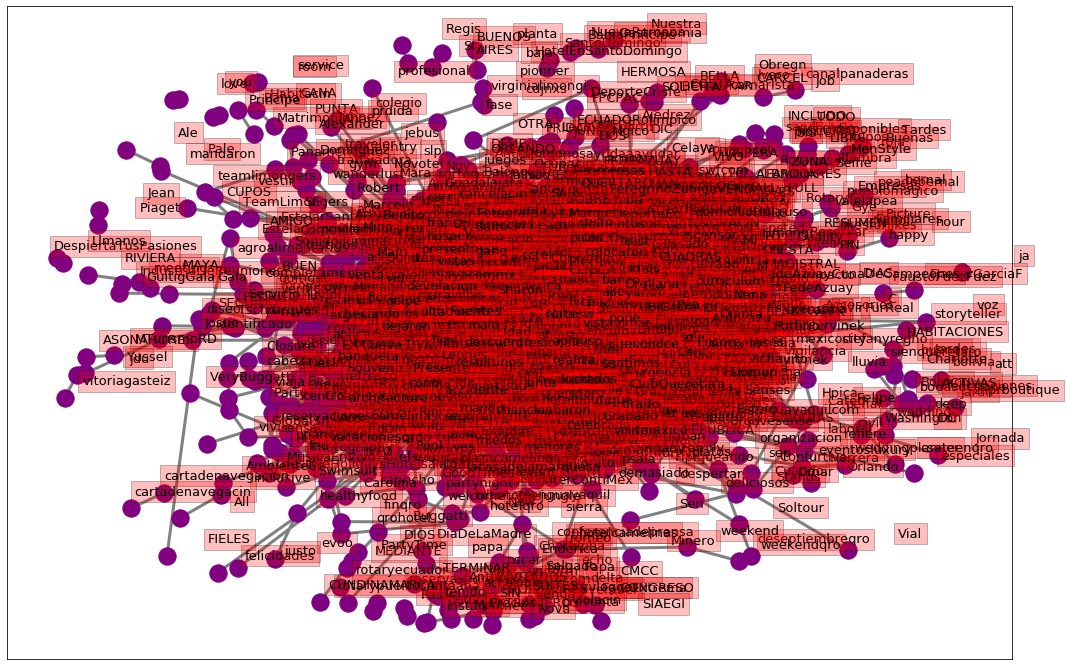

In [241]:
G = nx.Graph()

for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

fig, ax = plt.subplots(figsize=(18, 12))

pos = nx.spring_layout(G, k=1)

nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
plt.show()

# Visualization of Bigrams Hospedaje

In [242]:
d = hospedaje_df_s.set_index('Bigrams').T.to_dict('records')

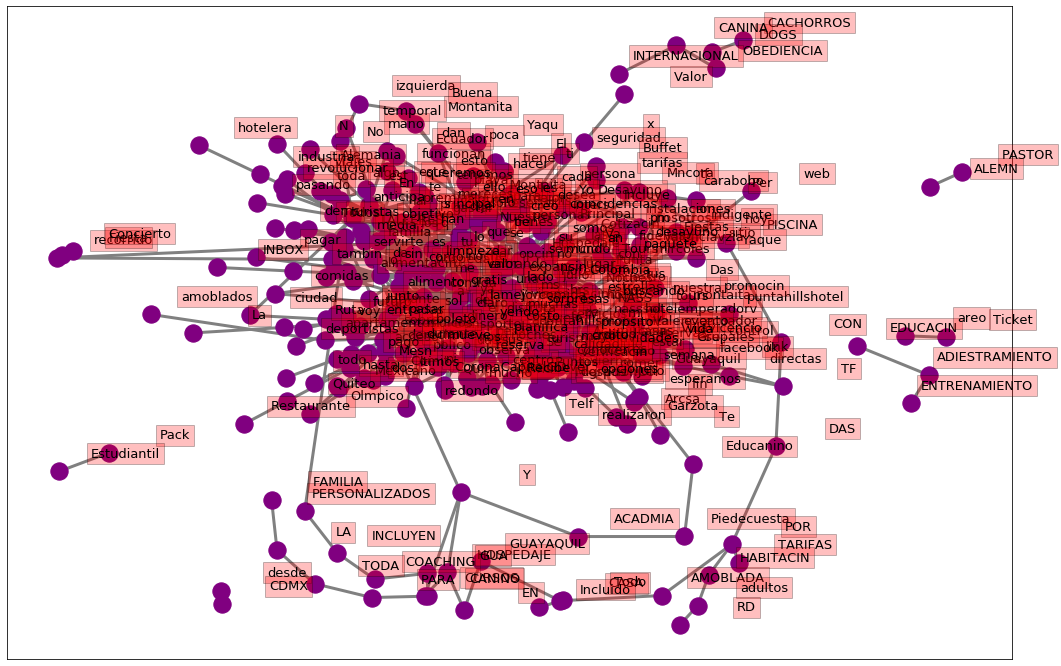

In [243]:
G = nx.Graph()

for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

fig, ax = plt.subplots(figsize=(18, 12))

pos = nx.spring_layout(G, k=1)

nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
plt.show()

# Visualization of Bigrams Airbnb

In [244]:
d = airbnb_df_s.set_index('Bigrams').T.to_dict('records')

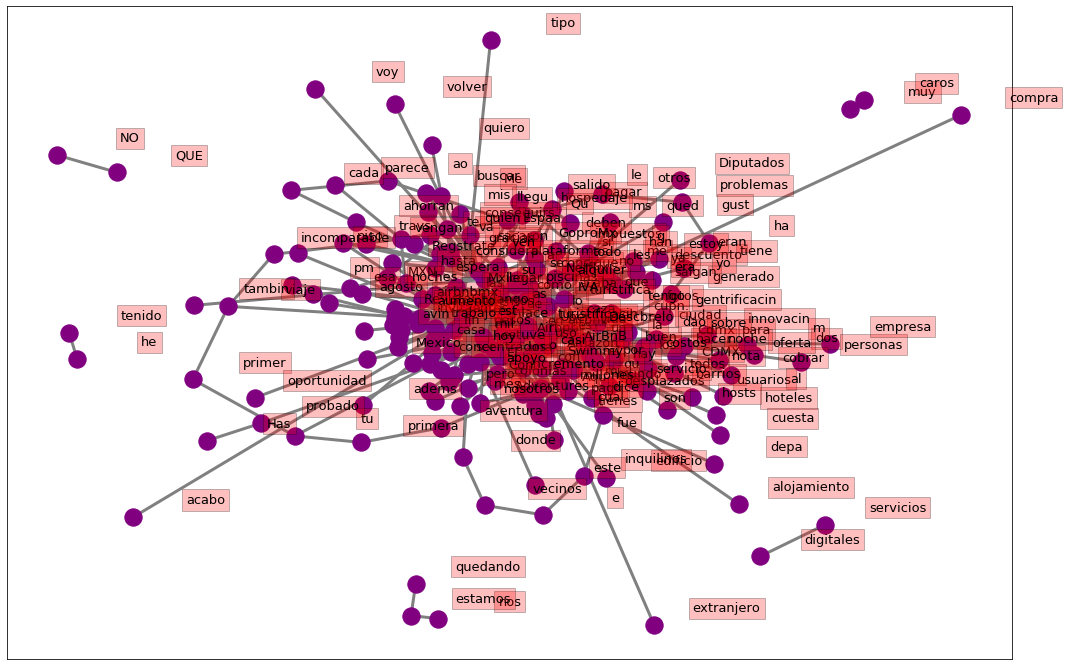

In [245]:
G = nx.Graph()

for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))


fig, ax = plt.subplots(figsize=(18, 12))

pos = nx.spring_layout(G, k=1)

nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
plt.show()